# Analisis Exploratorio de Datos

In [35]:
import pandas as pd
import numpy as np
from etl import movies_data

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [36]:
movies_data.head()

,id,title,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year,return,collection_id,collection_name
0,862,Toy Story,30000000,"[Animation, Comedy, Family]",en,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,81.0,[English],7.7,5415,1995,12.451801,10194.0,Toy Story Collection
1,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,104.0,"[English, Français]",6.9,2413,1995,4.043035,NaN,NaN
2,15602,Grumpier Old Men,0,"[Romance, Comedy]",en,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0,101.0,[English],6.5,92,1995,0.000000,119050.0,Grumpy Old Men Collection
3,31357,Waiting to Exhale,16000000,"[Comedy, Drama, Romance]",en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156,127.0,[English],6.1,34,1995,5.090760,NaN,NaN
4,11862,Father of the Bride Part II,0,[Comedy],en,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911,106.0,[English],5.7,173,1995,0.000000,96871.0,Father of the Bride Collection


In [37]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45363 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    45363 non-null  int32         
 1   title                 45363 non-null  object        
 2   budget                45363 non-null  int32         
 3   genres                45363 non-null  object        
 4   original_language     45352 non-null  object        
 5   popularity            45363 non-null  float64       
 6   production_companies  45363 non-null  object        
 7   production_countries  45363 non-null  object        
 8   release_date          45363 non-null  datetime64[ns]
 9   revenue               45363 non-null  int32         
 10  runtime               45117 non-null  float64       
 11  spoken_languages      45363 non-null  object        
 12  vote_average          45363 non-null  float64       
 13  vote_count           

A pesar del tratamiento aplicado a los valores de varias columnas seleccionadas, aún quedan algunas columnas con valores nulos. Específicamente, las columnas ``collection_id`` y ``collection_name`` presentan un número significativo de valores nulos. Esto es comprensible, ya que muchas de las películas no pertenecen a ninguna saga cinematográfica en particular.

In [39]:
movies_data.isnull().any()

id                      False
title                   False
budget                  False
genres                  False
original_language        True
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                  True
spoken_languages        False
vote_average            False
vote_count              False
release_year            False
return                  False
collection_id            True
collection_name          True
dtype: bool

In [40]:
movies_data.isnull().sum()

id                          0
title                       0
budget                      0
genres                      0
original_language          11
popularity                  0
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                   246
spoken_languages            0
vote_average                0
vote_count                  0
release_year                0
return                      0
collection_id           40888
collection_name         40888
dtype: int64

## Variable cuantitativas

Se observó que algunas columnas como ``budget``, ``popularity`` y ``revenue`` contienen valores nulos, especialmente en las columnas relacionadas con sagas cinematográficas, lo cual es comprensible. Además, se destaca que la mayoría de las películas tienen un presupuesto, popularidad y ganancias de 0, lo que indica que hay películas con registros faltantes o películas menos conocidas con resultados financieros más bajos.



En cuanto a las estadísticas generales, se puede observar que el tiempo promedio de duración de las películas es de aproximadamente 94 minutos, mientras que la calificación promedio es de alrededor de 5.62. Además, la mayoría de las películas tienen un número de votos relativamente bajo, con un promedio de alrededor de 110 votos. Además, el conjunto de datos abarca un amplio rango de años de lanzamiento, desde películas muy antiguas hasta películas más recientes.

A continuación se presentan gráficas que muestran la distribución y los diagramas de caja (boxplots) de las variables analizadas. La mayoría de estas variables exhiben una presencia significativa de valores atípicos (outliers), así como un número considerable de valores igual a cero e incluso negativos, como es el caso de la variable ``revenue`` (ingresos). Sin embargo, la distribución del voto promedio (``vote_average``) y el año de lanzamiento (``release_year``) resultan más consistentes. En la distribución del voto promedio se observa una ligero sesgo hacia la derecha, además de una notable cantidad de votos con valor cero. Por otro lado, en la distribución del año de lanzamiento se aprecia un sesgo más pronunciado hacia la derecha, lo cual sugiere que con el paso del tiempo se han producido cada vez más películas.

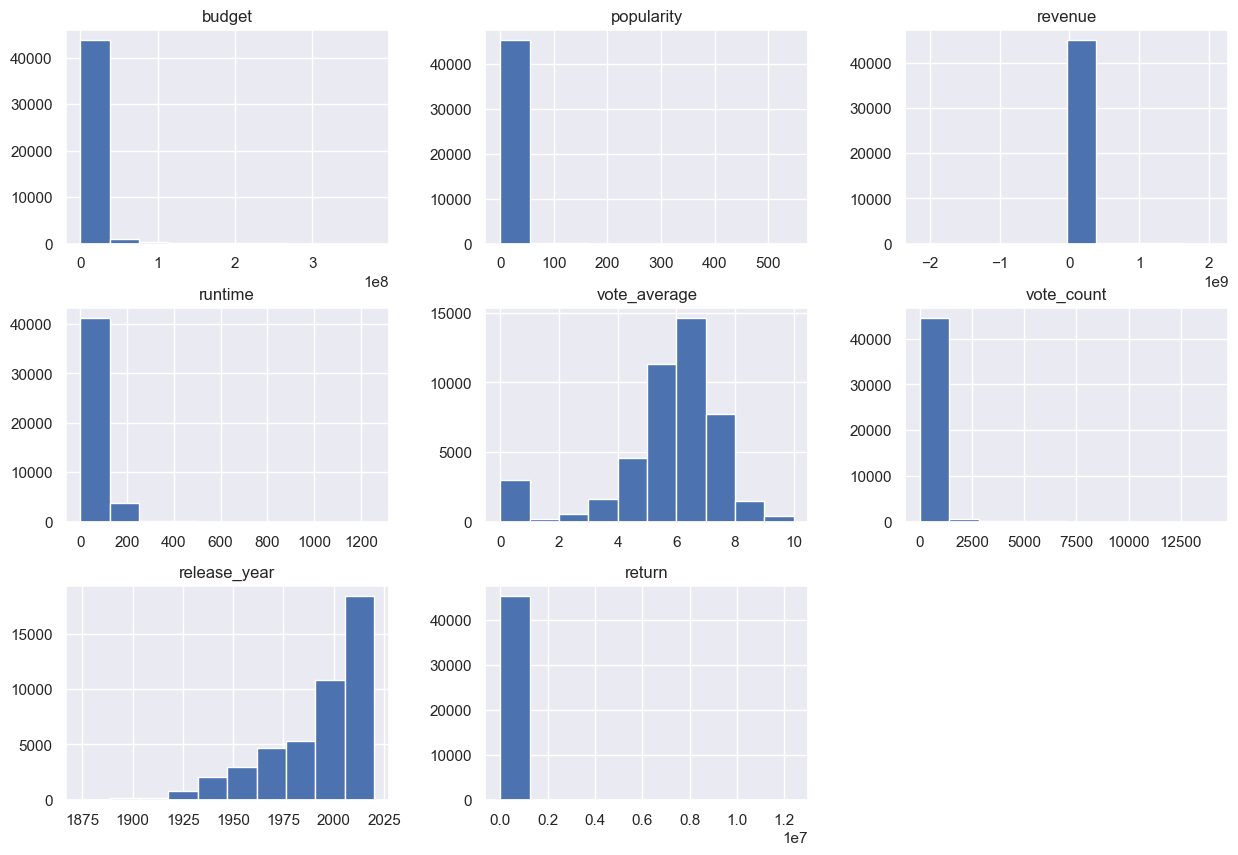

In [44]:
numerical_features = ['budget', 'popularity', 'revenue', 'runtime', 
                      'vote_average', 'vote_count', 'release_year', 'return']
movies_data[numerical_features].hist(figsize=(15, 10));

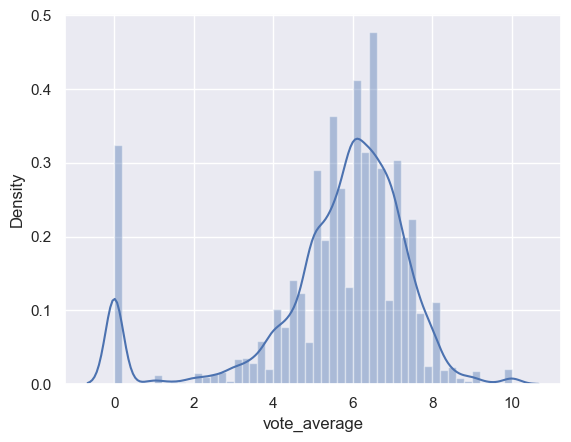

In [46]:
sns.distplot(movies_data['vote_average']);

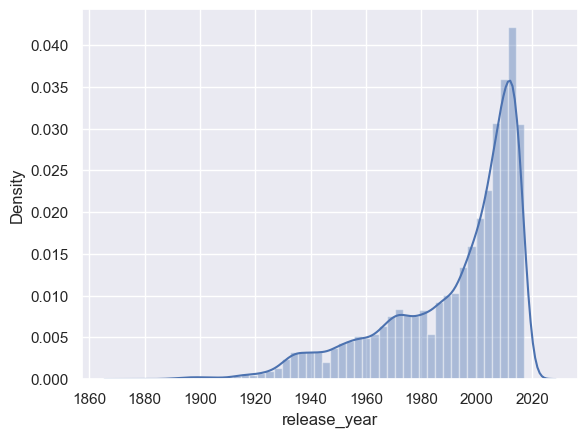

In [47]:
sns.distplot(movies_data['release_year']);

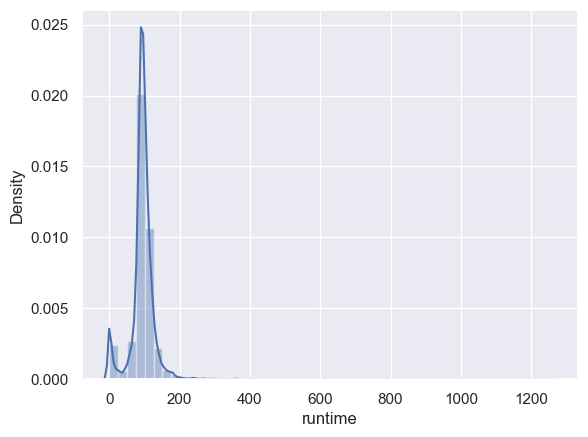

In [51]:
sns.distplot(movies_data['runtime']);

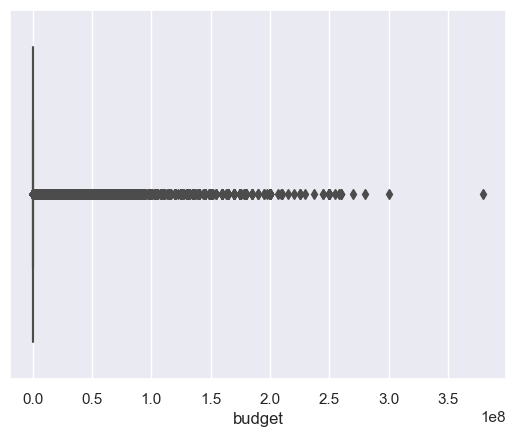

In [48]:
sns.boxplot(data= movies_data, x= 'budget');

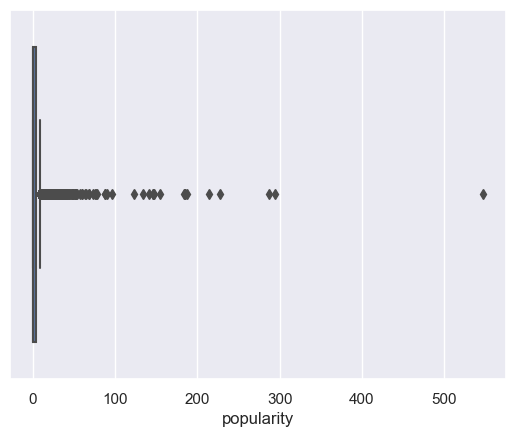

In [49]:
sns.boxplot(data= movies_data, x= 'popularity');

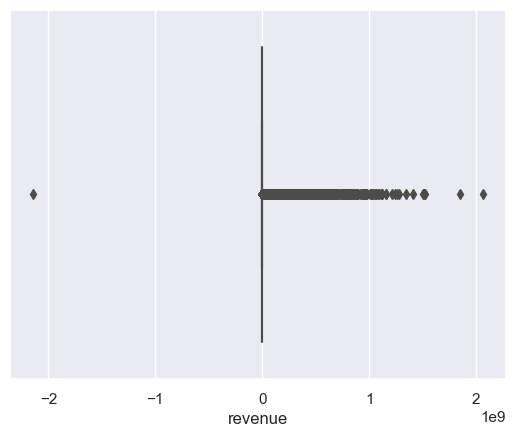

In [50]:
sns.boxplot(data= movies_data, x= 'revenue');

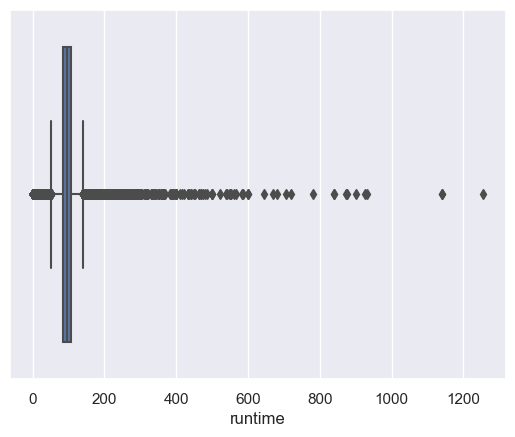

In [52]:
sns.boxplot(data= movies_data, x= 'runtime');

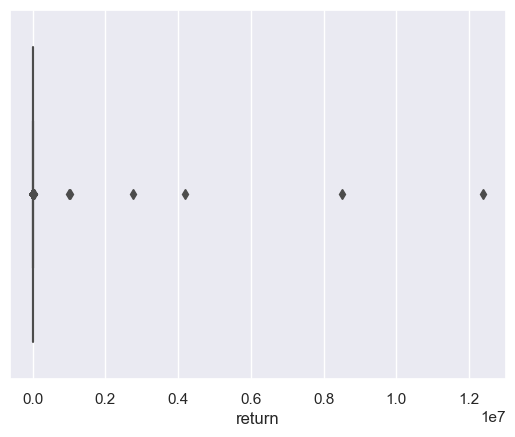

In [55]:
sns.boxplot(data= movies_data, x= 'return');

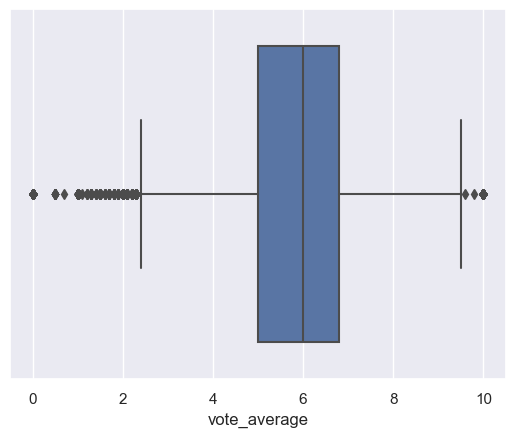

In [58]:
sns.boxplot(data= movies_data, x= 'vote_average');

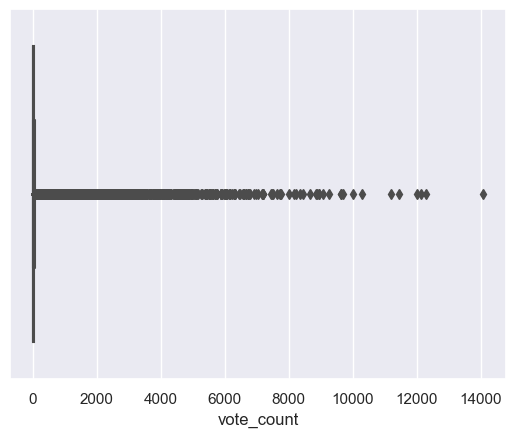

In [59]:
sns.boxplot(data= movies_data, x= 'vote_count');

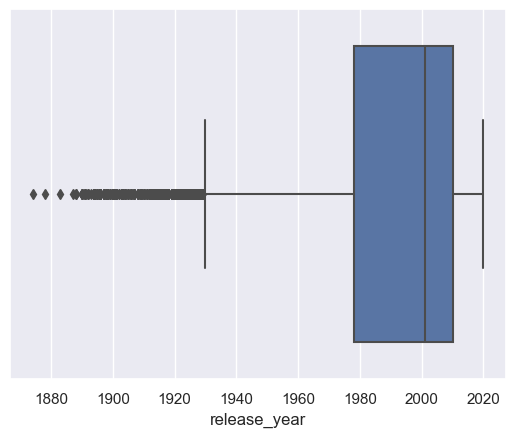

In [60]:
sns.boxplot(data= movies_data, x= 'release_year');

In [54]:
movies_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
budget,45363.0,4.233796e+06,1.744222e+07,0.000000e+00,0.000000,0.000000,0.000000,3.800000e+08
popularity,45363.0,2.926515e+00,6.010299e+00,0.000000e+00,0.388835,1.130302,3.691946,5.474883e+02
revenue,45363.0,1.112451e+07,6.387461e+07,-2.147484e+09,0.000000,0.000000,0.000000,2.068224e+09
runtime,45117.0,9.417818e+01,3.834504e+01,0.000000e+00,85.000000,95.000000,107.000000,1.256000e+03
vote_average,45363.0,5.624064e+00,1.915402e+00,0.000000e+00,5.000000,6.000000,6.800000,1.000000e+01
vote_count,45363.0,1.101175e+02,4.918107e+02,0.000000e+00,3.000000,10.000000,34.000000,1.407500e+04
release_year,45363.0,1.991880e+03,2.405713e+01,1.874000e+03,1978.000000,2001.000000,2010.000000,2.020000e+03
return,45363.0,6.602315e+02,7.470400e+04,-9.061112e+00,0.000000,0.000000,0.000000,1.239638e+07


## Variables cualitativas

In [75]:
all_genres = [genre for genres in movies_data['genres'] for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()
genre_counts

Drama              20245
Comedy             13179
Thriller            7616
Romance             6732
Action              6590
Horror              4669
Crime               4304
Documentary         3921
Adventure           3493
Science Fiction     3039
Family              2768
Mystery             2462
Fantasy             2311
Animation           1930
Foreign             1619
Music               1598
History             1397
War                 1323
Western             1042
TV Movie             766
Name: count, dtype: int64

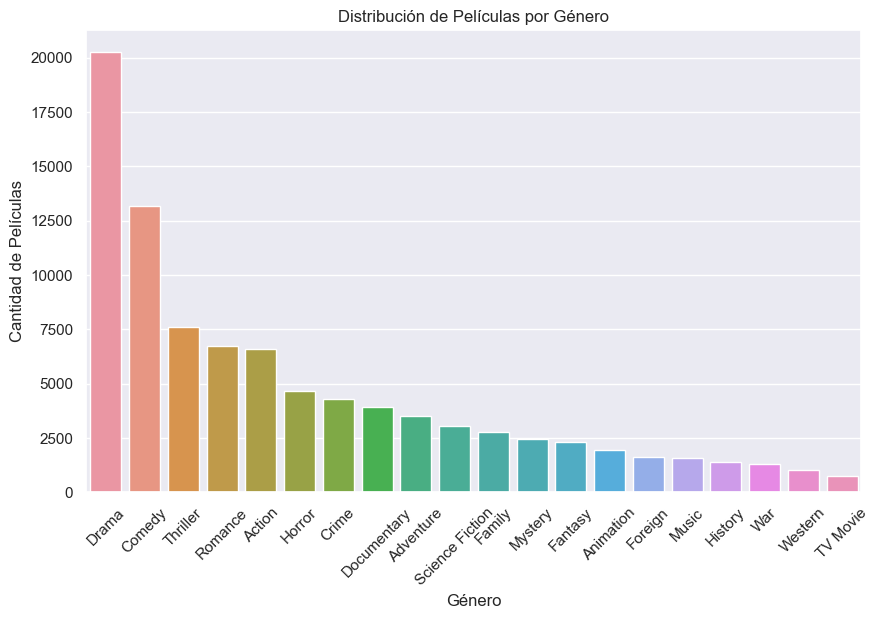

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Género');

In [80]:
all_produc_companies = [company for companies in movies_data['production_companies'] for company in companies]
produc_companies_counts = pd.Series(all_produc_companies).value_counts()
produc_companies_counts

Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1075
Paramount Pictures                        1003
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
                                          ... 
DumbDumb                                     1
China Blue Productions                       1
Arts Council of Wales                        1
Havas Images                                 1
Yermoliev                                    1
Name: count, Length: 23533, dtype: int64

In [83]:
top_10_produc_companies = produc_companies_counts.nlargest(10)

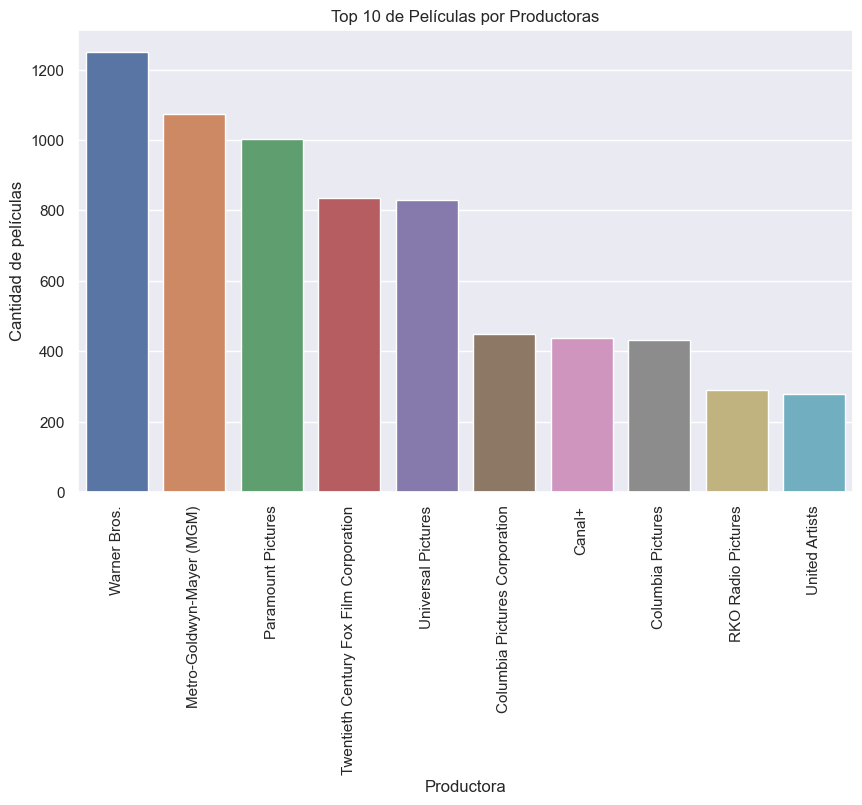

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_produc_companies.index, y=top_10_produc_companies.values)
plt.xticks(rotation=90)
plt.xlabel('Productora')
plt.ylabel('Cantidad de películas')
plt.title('Top 10 de Películas por Productoras');

In [91]:
all_produc_countries = [country for countries in movies_data['production_countries'] for country in countries]
produc_countries_counts = pd.Series(all_produc_countries).value_counts()
produc_countries_counts

United States of America    21144
United Kingdom               4088
France                       3935
Germany                      2250
Italy                        2167
                            ...  
Madagascar                      1
Somalia                         1
Kuwait                          1
Martinique                      1
Guinea                          1
Name: count, Length: 160, dtype: int64

In [92]:
top_10_produc_countries = produc_countries_counts.nlargest(10)

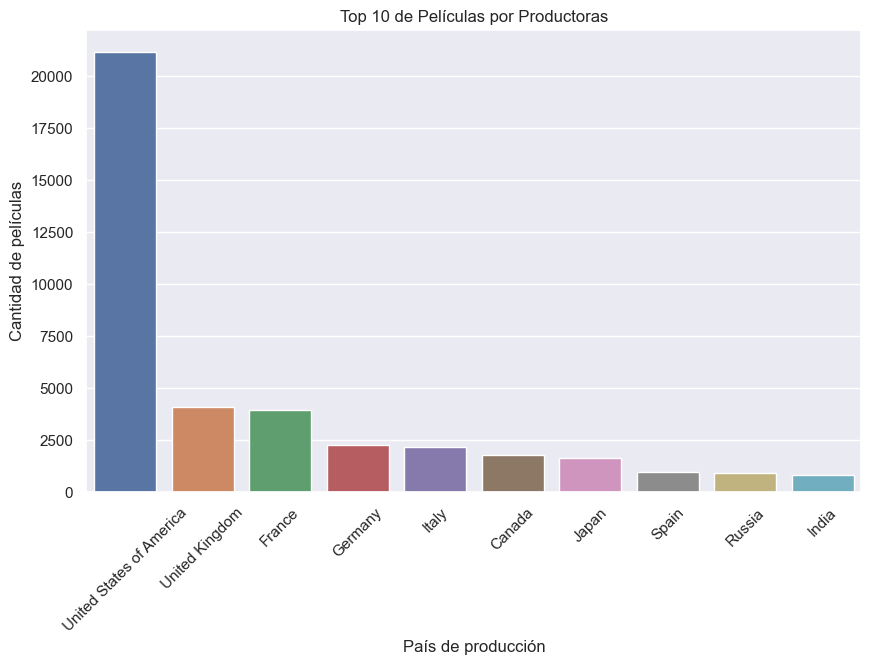

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_produc_countries.index, y=top_10_produc_countries.values)
plt.xticks(rotation=45)
plt.xlabel('País de producción')
plt.ylabel('Cantidad de películas')
plt.title('Top 10 de Películas por Productoras');

In [66]:
corr_matrix = movies_data[numerical_features].corr()
corr_matrix 

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
budget,1.000000,0.449587,0.752338,0.134770,0.073179,0.676610,0.131700,-0.002137
popularity,0.449587,1.000000,0.458712,0.129686,0.153755,0.559933,0.131704,0.003214
revenue,0.752338,0.458712,1.000000,0.101793,0.083100,0.777101,0.087886,0.000812
runtime,0.134770,0.129686,0.101793,1.000000,0.156774,0.113532,0.078834,0.000892
vote_average,0.073179,0.153755,0.083100,0.156774,1.000000,0.123608,0.026142,0.005590
vote_count,0.676610,0.559933,0.777101,0.113532,0.123608,1.000000,0.106810,0.003598
release_year,0.131700,0.131704,0.087886,0.078834,0.026142,0.106810,1.000000,-0.005017
return,-0.002137,0.003214,0.000812,0.000892,0.005590,0.003598,-0.005017,1.000000


<Axes: >

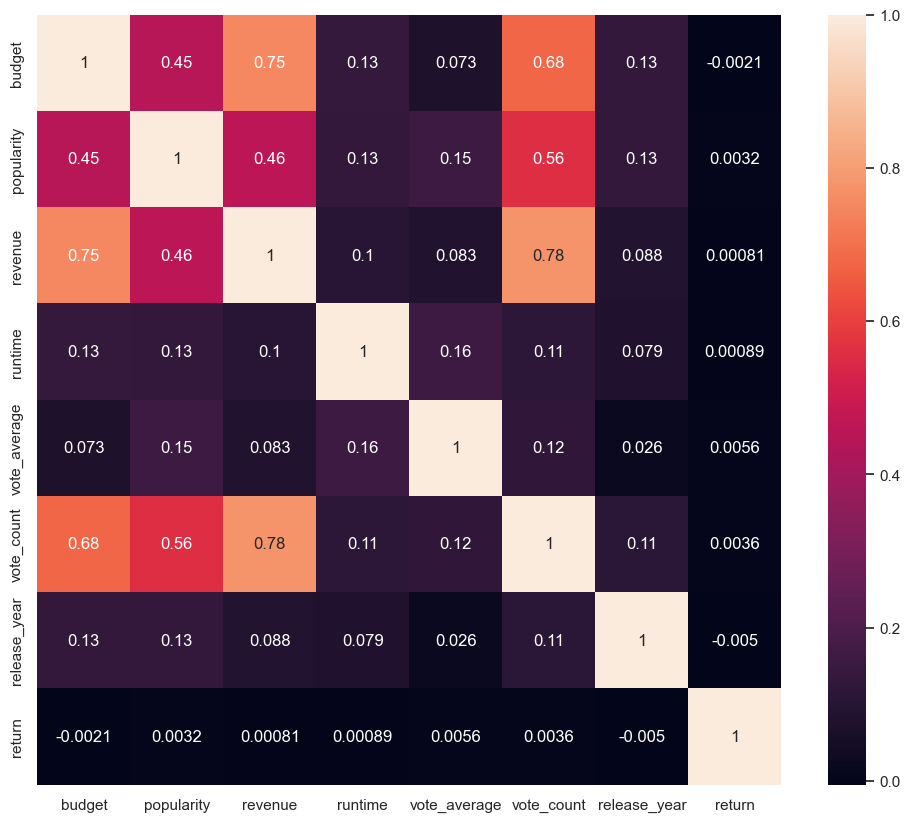

In [72]:
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Draw the heatmap
sns.heatmap(corr_matrix, annot=True)

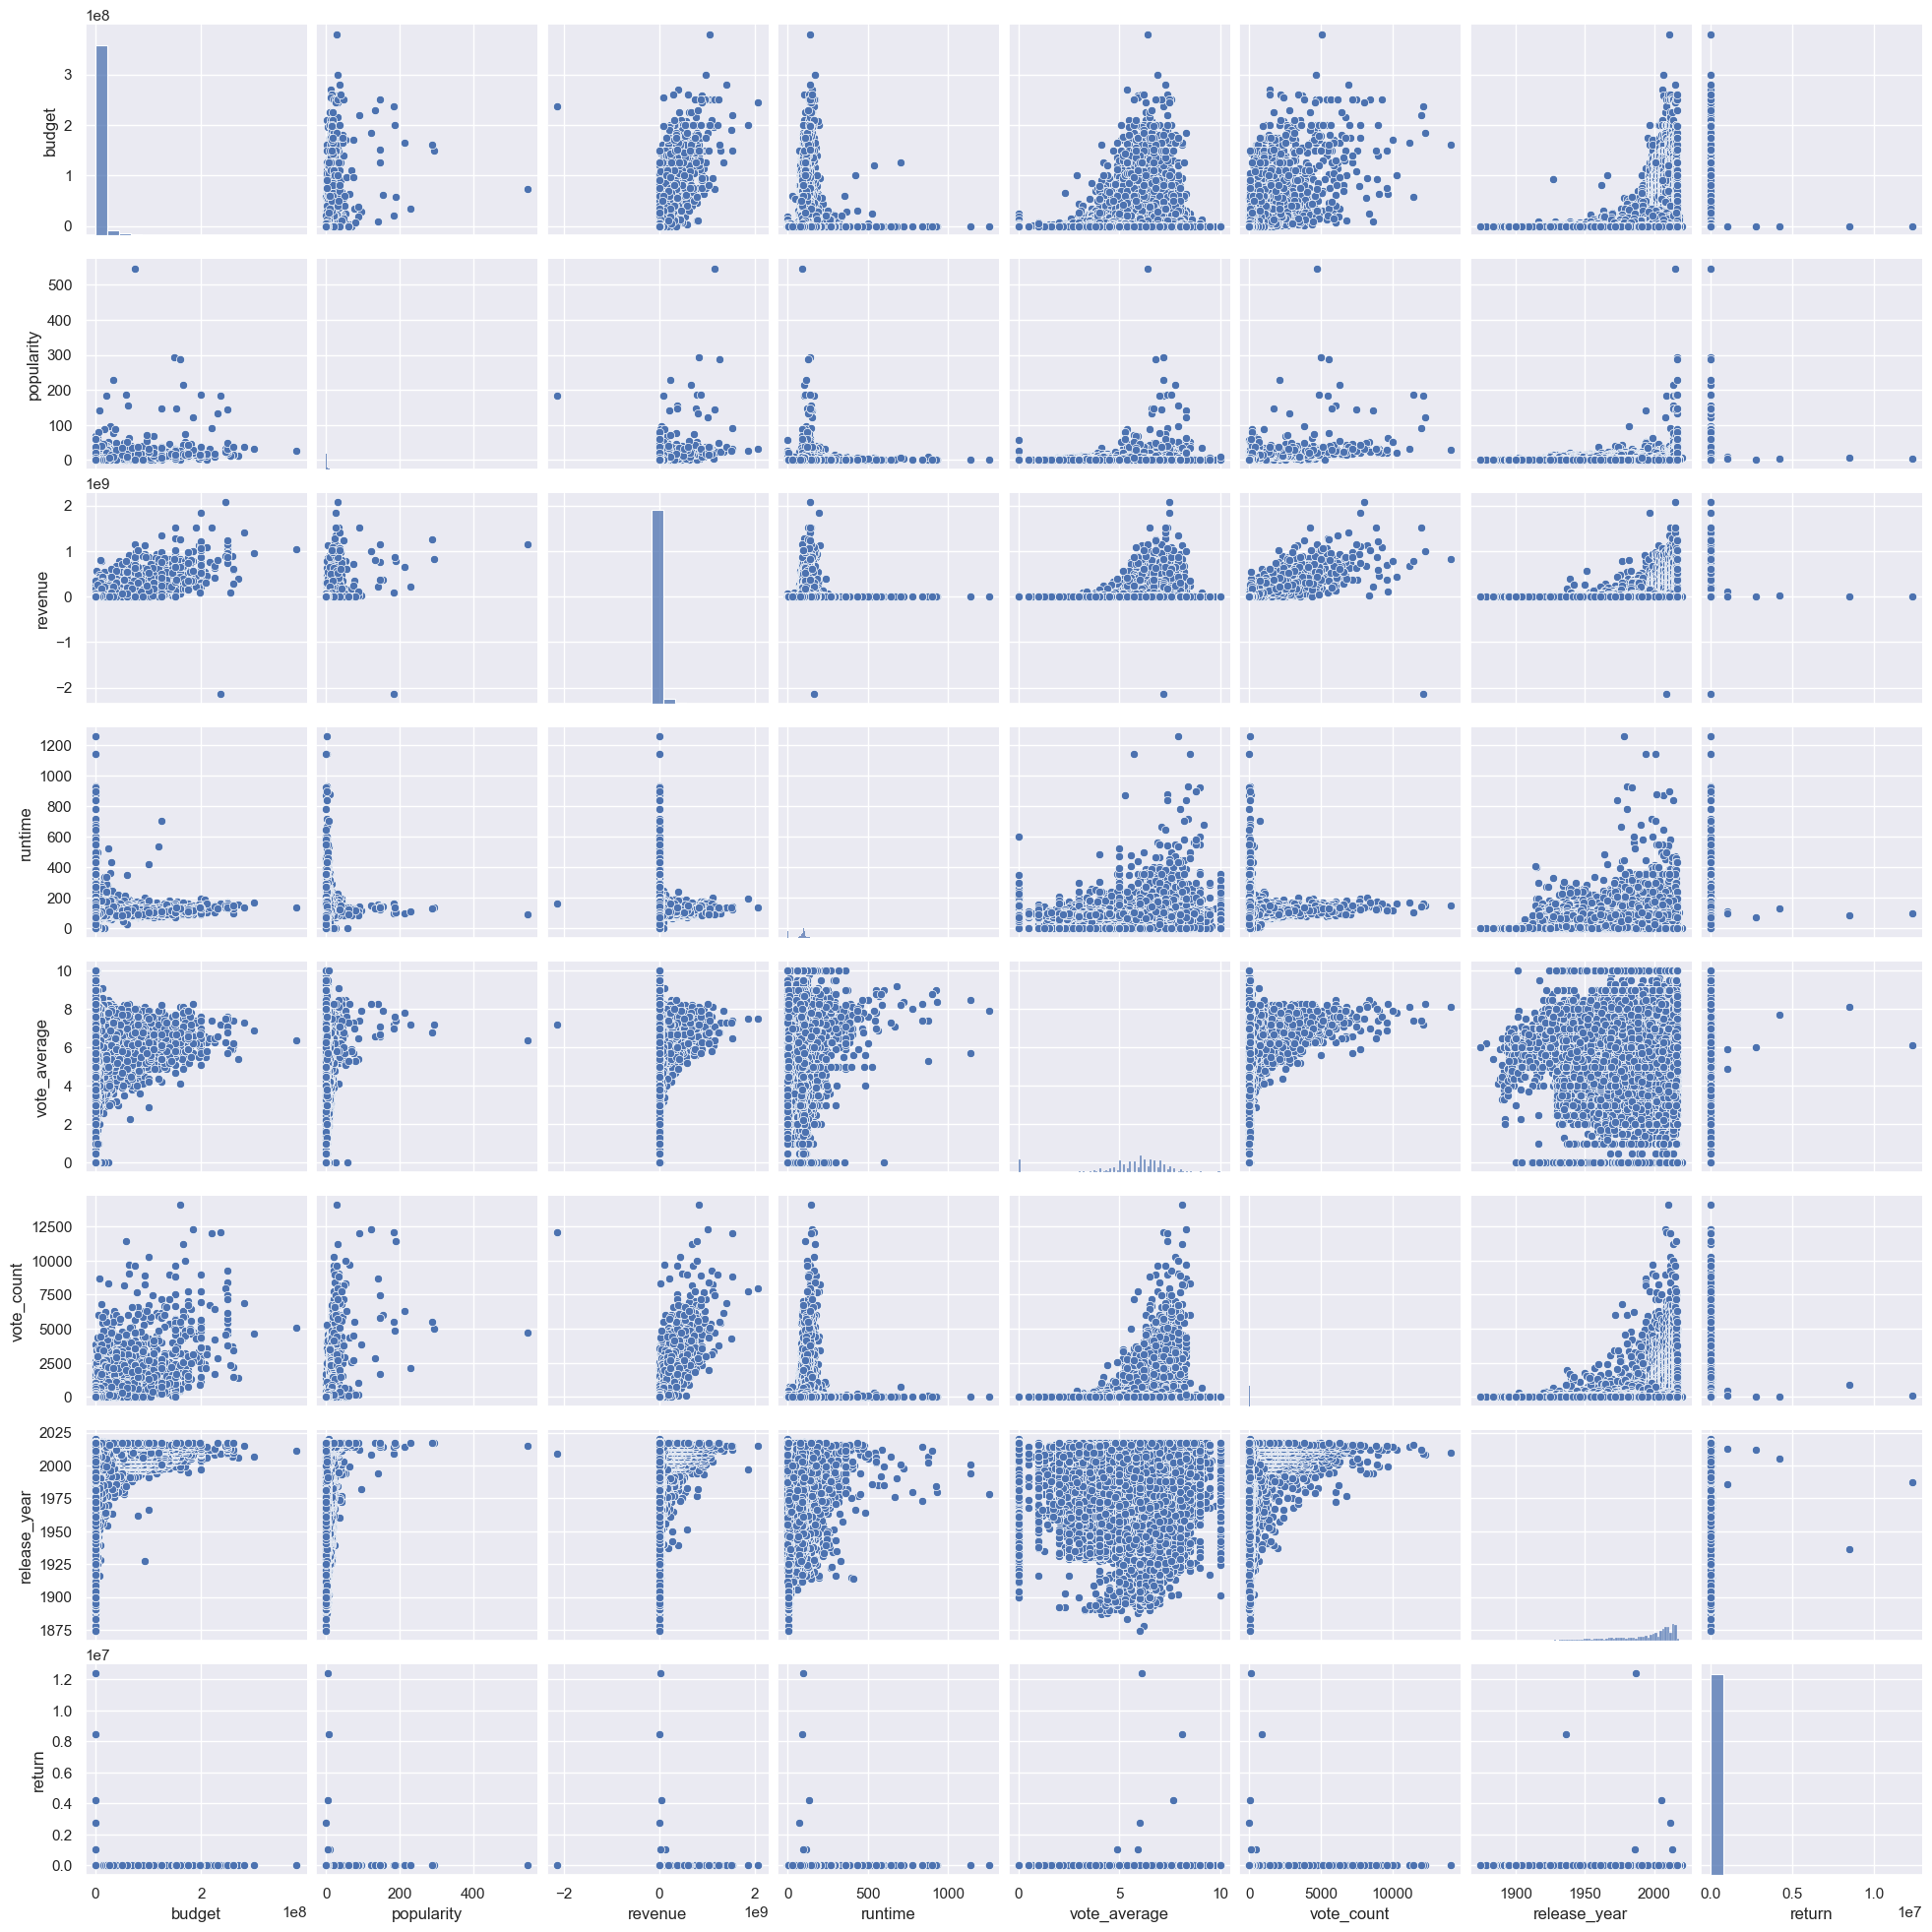

In [70]:
sns.pairplot(movies_data[numerical_features]);

En general, se observa que hay cierta correlación positiva entre las variables ``budget`` (presupuesto), ``popularity`` (popularidad) y ``revenue`` (ingresos), lo que sugiere que películas con presupuestos más altos tienden a tener mayores niveles de popularidad y mayores ingresos. Además, también se observa una correlación moderada entre ``vote_count`` (cantidad de votos) y ``revenue``, lo que indica que las películas con mayor cantidad de votos tienden a generar mayores ingresos.

Por otro lado, las variables ``runtime`` (duración), ``vote_average`` (calificación promedio) y ``release_year`` (año de lanzamiento) presentan correlaciones más débiles entre sí y con las demás variables. Esto indica que estas variables no están fuertemente relacionadas entre sí o con las demás características del conjunto de datos. 